## Predict the percentage of marks of a student based on the number of study hours. This is a simple regression problem using 2 variables. 

In [3]:
Dataset: ['http://bit.ly/w-data']

### Import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Import and read the data

In [5]:
data=pd.read_csv(r'C:\Users\Harshitha\Desktop\TSF Internship\stud.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.shape

(25, 2)

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking for outliers

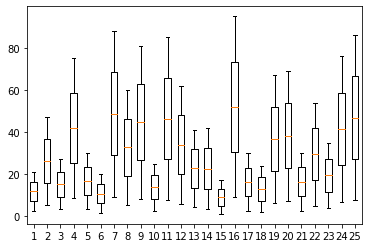

In [10]:
plt.boxplot(data)
plt.show()

### Data Visualization

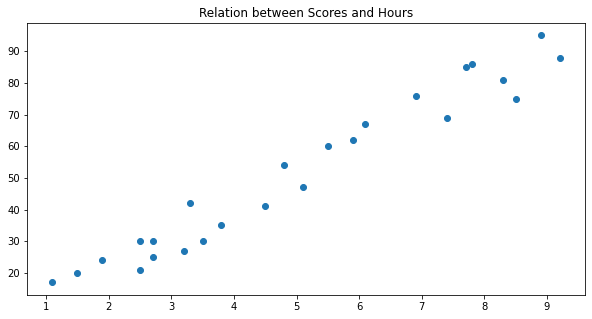

<Figure size 432x288 with 0 Axes>

In [29]:
fig,ag=plt.subplots(figsize=(10,5))
plt.title('Relation between Scores and Hours')
ag.scatter(data['Hours'],data['Scores'])
x=data['Hours']
y=data['Scores']
plt.figure()
plt.show()

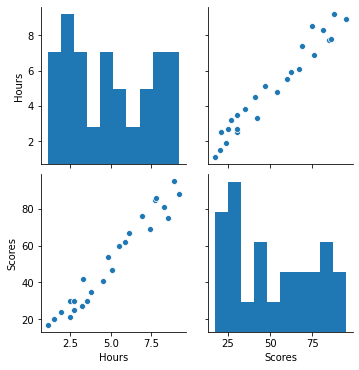

In [16]:
sns.pairplot(data)

Map shows there is 98% corellation between Hours and Studies


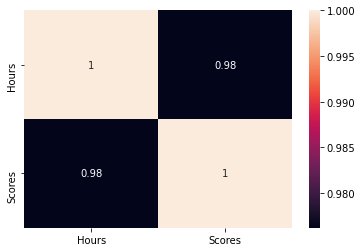

In [19]:
sns.heatmap(data.corr(),annot=True)
print('Map shows there is 98% corellation between Hours and Studies')

### Preparing the data for analysis

In [21]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Splitting the dataset into training and testing data

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
print('Training Successful')

Training Successful


### Visualizing training dataset results

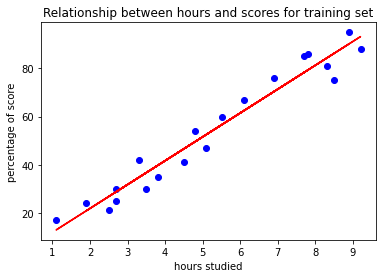

In [46]:
line=model.coef_ *x + model.intercept_
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')
plt.title('Relationship between hours and scores for training set')
plt.xlabel('hours studied')
plt.ylabel('percentage of score')
plt.show()

### Predicting datasets

In [47]:
y_pred = model.predict(x_test)
print(y_pred)
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
print(pred_data)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


### Visualizing testing dataset results

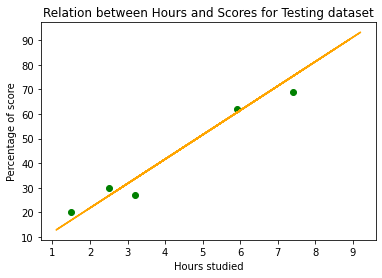

In [52]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, model.predict(x_train), color='orange')
plt.title('Relation between Hours and Scores for Testing dataset')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of score')
plt.show()

### Accuracy of the model

In [57]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

### What will be the predicted score if a student studies for 9.25 hrs a day?

In [58]:
a=model.predict([[9.25]])
print('The predicted score if a student studies for 9.25 hours a day would be',a)

The predicted score if a student studies for 9.25 hours a day would be [93.69173249]


### Evaluating the model

In [60]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MAS= mean_absolute_error(y_test, y_pred)
print('Mean Squared error is', MSE)
print('Mean absolute error is',MAS)

Mean Squared error is 21.5987693072174
Mean absolute error is 4.183859899002975
